In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from dateutil import relativedelta

In [40]:
st_id = 35320
vk_id = 253802
rs_id = 34102

In [41]:
url = 'https://stats.espncricinfo.com/ci/engine/player/{}.html?class={};template=results;type=allround;view=match'

In [42]:
def get_player_info(player_id, formatt):
    player_url = url.format(formatt, player_id)
    data = pd.read_html(player_url)[3]
    data['Bat1'] = data['Bat1'].astype(str)
    data['Bat1'] = data['Bat1'].str.replace('*', '')
    data['Bat1'] = data['Bat1'].str.replace('-', '0')
    data['Bat1'] = data['Bat1'].str.replace('DNB', '0')
    data['Bat1'] = data['Bat1'].str.replace('TDNB', '0')
    data['Bat1'] = data['Bat1'].str.replace('T0', '0')
    data['Bat1'] = data['Bat1'].astype(float).astype(int)
    return data

In [43]:
st_data = get_player_info(2, st_id)
vk_data = get_player_info(2, vk_id)
rs_data = get_player_info(2, rs_id)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


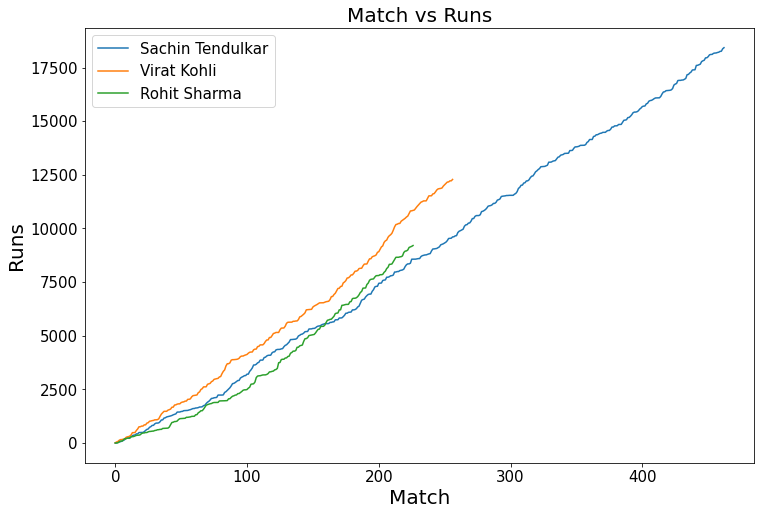

In [44]:
fig = plt.figure(figsize=(12, 8))
plt.plot(st_data['Bat1'].cumsum())
plt.plot(vk_data['Bat1'].cumsum())
plt.plot(rs_data['Bat1'].cumsum())
plt.xlabel('Match', fontsize=20)
plt.ylabel('Runs', fontsize=20)
plt.title('Match vs Runs', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(['Sachin Tendulkar', 'Virat Kohli', 'Rohit Sharma'], fontsize=15)

In [45]:
st_dob = datetime(1973, 4, 24)
date = datetime(1989, 12, 18)

diff = relativedelta.relativedelta(date, st_dob)

years = diff.years
months = diff.months
days = diff.days

print('{} years {} months {} days'.format(years, months, days))

16 years 7 months 24 days
